#Predicting Value of C02 Emission

## 1- Business Understanding

Main Goal: Predict the value of Carbon Dioxide emission.

Main Objective: Building a predictive model

## 2- Analytic Approach

How can you use data yo answer the question and solve the problem?

It is important to select the right analytic approach to solve the problem. We are going to use the Simple Linear Regression algorithm to solve the problem.

## 3- Data Requirements

Necessary data content, Data Formats, Sources for initial data collection.

In this project, we need to collect data about the CO2 emission, engine size and fuel consumption.

## 4- Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

## 5- Data Understanding

Data understanding encompasses all activities related to constructing the data set

## 6- Data Preparation

In [1]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-08-12 15:17:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2024-08-12 15:17:57 (1.60 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [2]:
#import library
import pandas as pd

# read data
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#check missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
#cheecking missing values
df.isnull().sum()

,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0


In [5]:
#descriptive
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


## 6- Data Preparation

Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to 90% of the overall project time.

#Data Cleaning

* Skipped, because the data we are currently using has been cleaned.

**EDA**

**Note: Correlation Function only works for numerical columns**

* So make sure the columns selected is numerical
* 2 methods how to select only the numerical columns


In [6]:
#Method: To select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

#generate the correlation
df_numeric.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [7]:
#Method 2: To only select the numerical columns By individually listing each columns
ndf = df[['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
ndf.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

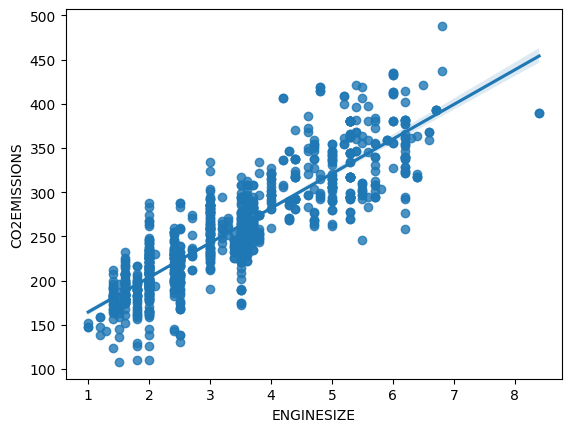

In [8]:
#import libraries for visualization
from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x = 'ENGINESIZE', y='CO2EMISSIONS', data=df)

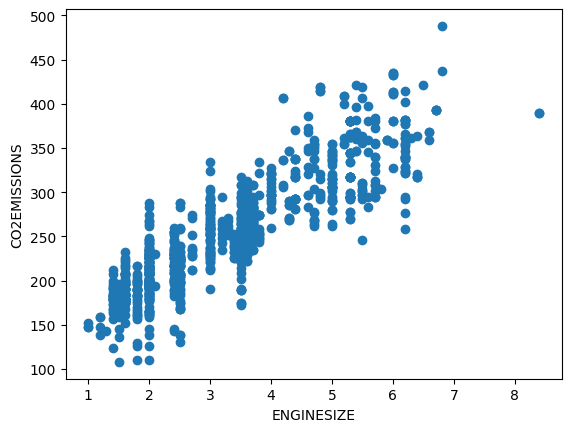

In [9]:
plt.scatter(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.xlabel('ENGINESIZE')
plt.ylabel ('CO2EMISSIONS')
plt.show()

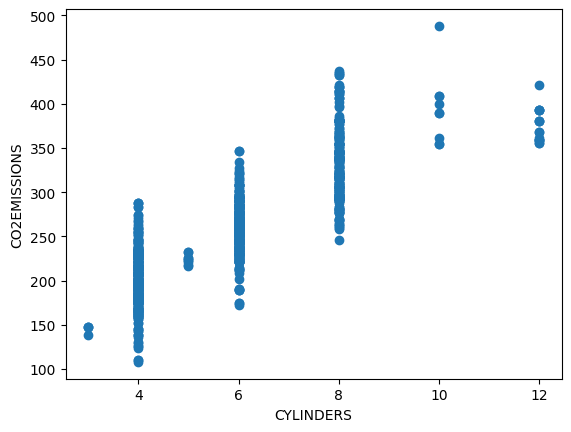

In [10]:
plt.scatter(x='CYLINDERS', y='CO2EMISSIONS', data=df)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

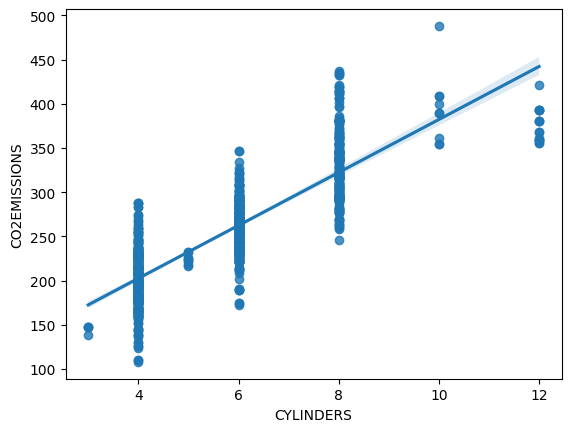

In [11]:
sns.regplot(x = 'CYLINDERS', y='CO2EMISSIONS', data=df)

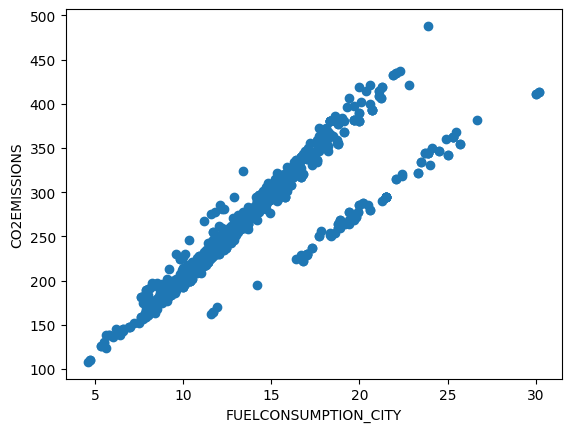

In [12]:
plt.scatter(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS', data=df)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS'>

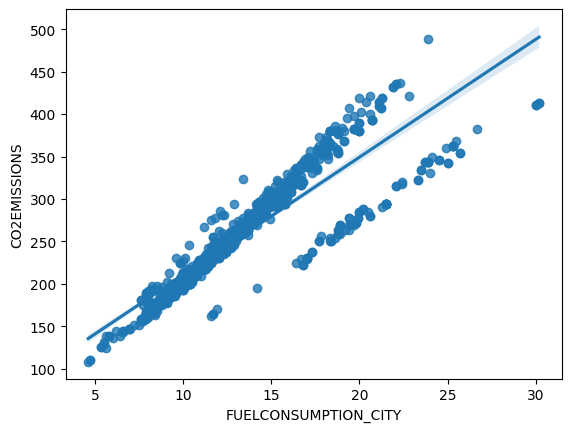

In [13]:
sns.regplot(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS', data=df)
#included the fit line

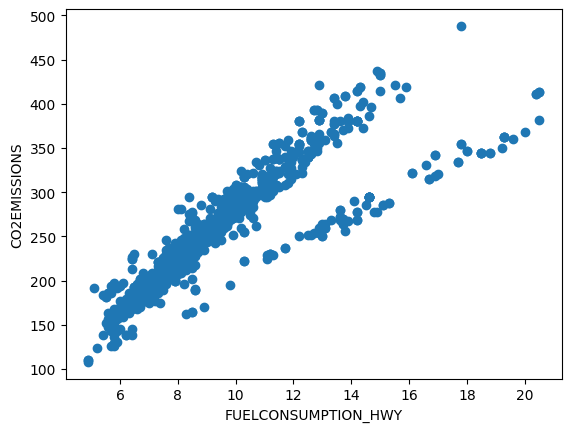

In [14]:
plt.scatter(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', data=df)
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS'>

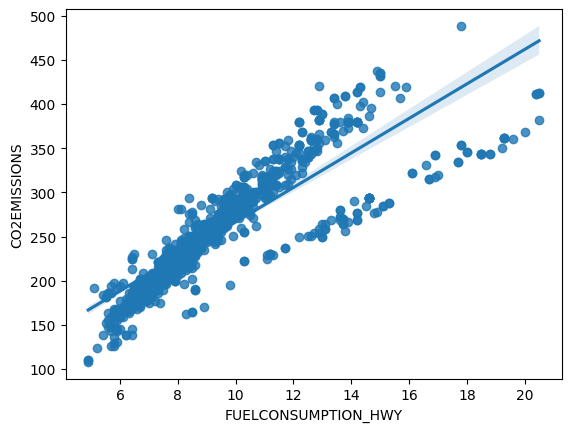

In [15]:
sns.regplot(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', data=df)
#included the fit line

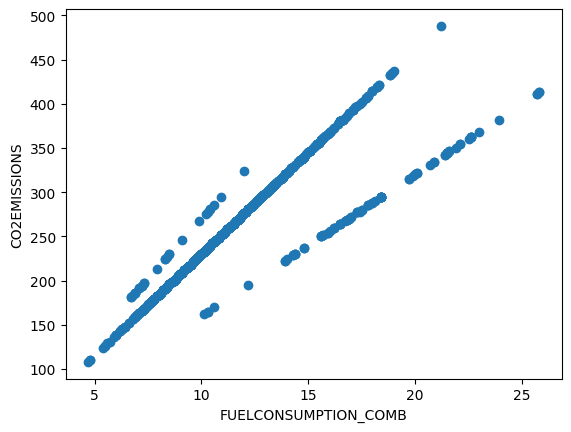

In [16]:
plt.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

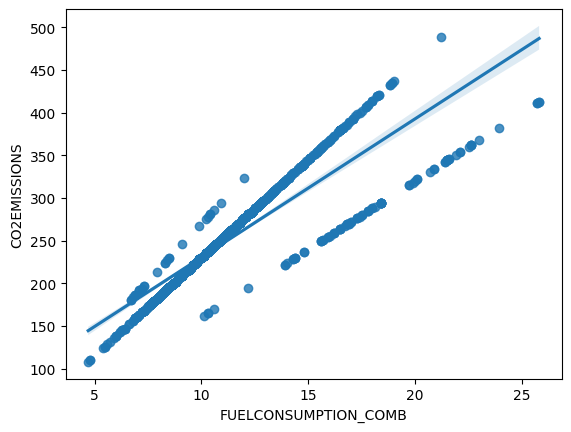

In [17]:
sns.regplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df)

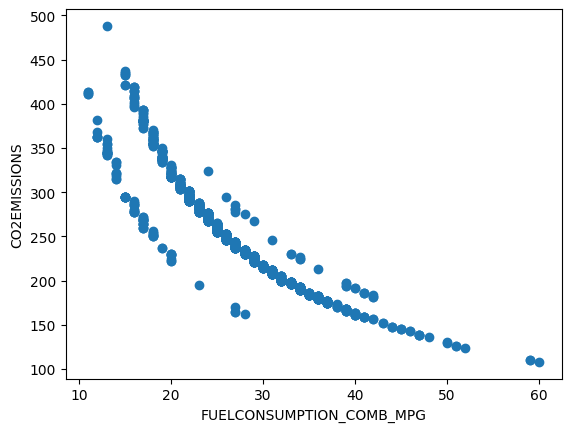

In [18]:
plt.scatter(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', data=df)
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

<Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='CO2EMISSIONS'>

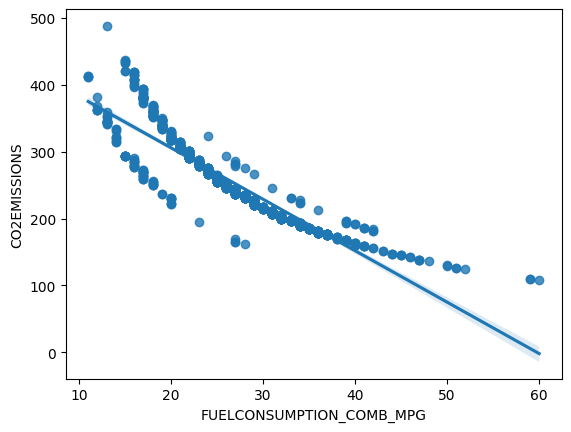

In [19]:
sns.regplot(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', data=df)

#Data Splitting

**The last step of EDA is to divide (data slitting) the data into 2 groups:**

* Training
* Testing

**Purpose of splitting the Data:**

**Model Training:**

* **Training Set:** The training is used to train your machine learning model. This involves learning the patterns and relationships in the data. By taining on this subset, the model can understand the underlying stricture of the data.

* **Testing Set:** The testing set is used to evaluate the performance of the trained model. It serves as new, unseen data to test how well the model generelizes to new, unseen instances. This is crucial to ensure that the mode is not just memorizing the training data (overfitting) but also can perform well on new data.

**Importance of Data Splitting:**

**Generalization:**

* By splitting the data, you can evaluate how well your model generalizes to unseen data. This is importance to ensure the model will perform well in real-world scenarios where it encounters new data.

**Prevent Overfitting:**

* Overfitting occurs when a model learns the training data too well, including its noise and outliers. By evaluating the model on a separate testing set, you can detect overfitting and adjust your model accordingly.

**Model Validation:**

* The testing set provides a way to validate your model 's performance. Metrics calculated on the testing set give you an unbiased estimate of how your model is likely to perform in the real world.

###**Creating train and test dataset**

* Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive at with ratio of 80% to 20%. After which, the dataset is trained with the training set and test with the testing set.

* This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

* This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.


In [20]:
#Data Splitting Section
import numpy as np

#mask
#Create a boolean mask where approximately 80% of the values are True
#Create a mask to select random rows using np.random.ran() function
msk = np.random.rand(len(df)) < 0.8

train = df[msk] #use the mask to select approximately, 80% of the data for the training data set
test = df[~msk] # use the inverse of the mask to select the remaining 20% of the data for the testing set

**Train and Test Dataset Distribution**

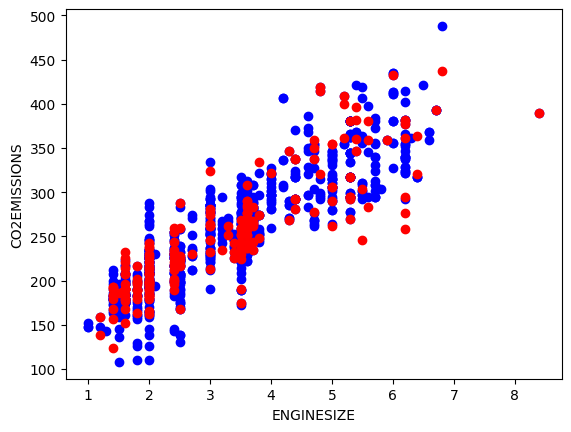

In [21]:
#train distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


## 7- Modelling

**In machine learning lingo**

* estimating the parameters is called 'training the algorithm'
* evaluating a method is called 'testing the algorithm'

In [22]:
#from sklearn library we import the linear model
from sklearn import linear_model

#create the linear regression object (variable regr)
regr = linear_model.LinearRegression()

#since algorithms in ML prefer to work with arrays, we convert the datframe to arrays
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training the dataset

regr.fit(train_x, train_y)

LinearRegression()

The are two conditions to run the cell.

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

On GitHub, the HTML representation is unable to render, hence try to load this page with nbviewer.org

In [23]:
print('The value of the slope is: ', regr.coef_)
print('The value of the intercept is: ', regr.intercept_)

The value of the slope is:  [[39.46794177]]
The value of the intercept is:  [124.3848725]


Text(0, 0.5, 'CO2 Emissions')

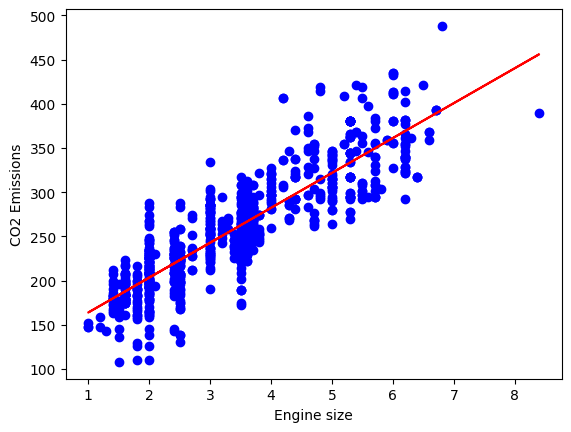

In [24]:
#once the model has learnt and we already know the intercept value and the slop, we can now visualised the best fitted line
#create the best fitted line

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emissions')

**Predict the value of y:**

In a linear regression model, the relationship between the dependent variable (CO2 emissions) and the independent variable (engine size) is given by:

* Formula: y = intercept + (coefficient*x)

**Purpose of formula:**

* **Linear Relationship:** The formula represents a linear relationship between two variables. It assumes that there is a straight-line relationship between the independent variable x and the dependent variable y.

* **Prediction:** The main use of this formula is to predict the value of y given a specific value of y given a specific value of x. For example, if x represents the size of an engine in litres and y representss the CO2 emissions, you can use this formula to predict CO2 emissions for a given engine size.



In [25]:
# y = regr.intercept_ + regr.coef_ * x

x = 2.4 # take as an example
y = regr.intercept_ + regr.coef_*x
y


array([[219.10793274]])

In [26]:
x = int(df['ENGINESIZE'].sample())  #the x is generated as random values
y = regr.intercept_ + regr.coef_*x
y

<ipython-input-26-fbacd8b0b11b>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x = int(df['ENGINESIZE'].sample())  #the x is generated as random values


array([[321.72458133]])

## 8- Evaluation

This imports the r2_score function from the sklearn.metrics module

* which is used to calculate the R-squared (R2) value, a measure of how well the predicted values match the actual values.

**Simple Linear Regression**

In [27]:
#import library
from sklearn.metrics import r2_score

#prepare the test data
#this converts the 'ENGINESIZE' and 'CO2EMISSIONS' columns from the test dataframe into numpy arrayss
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#the predicted test
test_y_ = regr.predict(test_x) #predicted value based on test_x

#calculate
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100), 2),'%')
print('The MSE is: ', round(np.mean((test_y_ - test_y)**2), 2))


The R2-score is:  75.23 %
The MSE is:  1006.13


##Simple Linear Regression is the regression between only one predictor and the target value. Hence, it needs to analyze and predict the other predictors or features.

**Trying to check the other correlated features**

In [28]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [29]:
#FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS (linear regression)
#create the linear regression object (predictor)
regr1 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframe to arrays
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training the dataset
regr1.fit(train_x, train_y)

#prepare the test data
#this converts the FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS columns from the test datafram into numpy array
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y =np.asanyarray(test[['CO2EMISSIONS']])

#prediction
test_y_ = regr1.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2), '%')
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  79.42 %
The MSE is:  83567.94
The MAE is:  1965.29


In [30]:
#CYLINDERS vs CO2EMISSIONS (linear regression)
#create the linear regression object (predictor)
regr2 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframe to arrays
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training the dataset
regr2.fit(train_x, train_y)

#prepare the test data
#this converts the CYLINDERS vs CO2EMISSIONS columns from the test datafram into numpy array
test_x = np.asanyarray(test[['CYLINDERS']])
test_y =np.asanyarray(test[['CO2EMISSIONS']])

#prediction
test_y_ = regr2.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2), '%')
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  73.4 %
The MSE is:  108013.36
The MAE is:  2482.47


In [31]:
#FUELCONSUMPTION_COMB vs CO2EMISSIONS (linear regression)
#create the linear regression object (predictor)
regr3 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframe to arrays
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training the dataset
regr3.fit(train_x, train_y)

#prepare the test data
#this converts the FUELCONSUMPTION_COMB vs CO2EMISSIONS columns from the test datafram into numpy array
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y =np.asanyarray(test[['CO2EMISSIONS']])

#prediction
test_y_ = regr3.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2), '%')
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  79.77 %
The MSE is:  82160.51
The MAE is:  1997.63


In [32]:
#FUELCONSUMPTION_CITY vs CO2EMISSIONS (linear regression)
#create the linear regression object (predictor)
regr4 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframe to arrays
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training the dataset
regr4.fit(train_x, train_y)

#prepare the test data
#this converts the FUELCONSUMPTION_CITY vs CO2EMISSIONS columns from the test datafram into numpy array
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y =np.asanyarray(test[['CO2EMISSIONS']])

#prediction
test_y_ = regr4.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2), '%')
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  80.6 %
The MSE is:  78776.86
The MAE is:  1906.69


In [33]:
#FUELCONSUMPTION_HWY vs CO2EMISSIONS (linear regression)
#Create the linear regression object (variable regr)
regr5 = linear_model.LinearRegression()

#Those algorithm in ML prefer to work with arrays
#We convert the dataframes to arrays
train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#Training
regr5.fit(train_x, train_y)

#Prepare the test data
# This converts the 'FUELCONSUMPTION_HWY' and 'CO2EMISSIONS' columns from the test DataFrame into NumPy arrays.
test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_=regr5.predict(test_x)

#Evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_ - test_y))))*100),2))

The R2-score is:  74.79
The MSE is:  102384.49
The MAE is:  2390.47


##Multiple Linear Regression

**Feature Selection Method:**

* **Backward Elimination:** Start with all candidate variables, remve the least significant variable, and repeat until all remaining variables are significant.
* **Forward Selection:** Start with no variables, add the most significant variable at each step, and repeat until no significant variables remain.
* **Stepwise Selection:** A combination of forward selection and backward elimination.
* **Regularization Methods:** Techniques like Lasso and Ridge regression add penalties for large coefficients and can help in feature selection.

In [34]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [38]:
#example of multiple linear regression using two predictors which are 'ENGINESIZE', 'CYLINDERS'
regr6 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#train the dataset
regr6.fit(train_x, train_y)

#prepare the testing dataset
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#prediction
test_y_ = regr6.predict(test_x)

#evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2), '%')
print('The MSE is: ', round((np.mean(test_y_ - test_y)**2)*100,  2))
print('The MAE is: ', round((np.mean(np.absolute(test_y_ - test_y))*100), 2))


The R2-score is:  85.77 %
The MSE is:  0.24
The MAE is:  1563.08


**Backward Elimination:** Start with all candidate variables, remove the least  significant variable, and repeat until all remaining variables are significant.

In [39]:
#define the algorithm
regr7 = linear_model.LinearRegression()

#convert data frame into array
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',
                               'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
                               'FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#fit the dataset
regr7.fit(train_x, train_y)

#prepare the test dataset
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',
                               'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
                               'FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#prediction
test_y_ = regr7.predict(test_x)

#evaluation
print('The R2-score is: ', round(((r2_score(test_y, test_y_))*100),2), '%')
print('The MSE is: ', round((np.mean(test_y_ - test_y)**2)*100,  2))
print('The MAE is: ', round((np.mean(np.absolute(test_y_ - test_y))*100), 2))

The R2-score is:  86.82 %
The MSE is:  2.58
The MAE is:  1517.21
